# Bitcoin Price Prediction Using Linear Regression

Bitcoin is the first decentralized digital currency created in 2009 that uses peer-to-peer technology to facilitate instant payments.

In this project, we will attempt to predict the prices of Bitcoin using linear regression. The training dataset for the project was collected from (URL). The data contains Bitcoin prices from April of 2013 to July of 2017.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from pathlib import Path
from warnings import simplefilter

simplefilter("ignore")  # ignore warnings to clean up output cells

# setting matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [2]:
# reading the files
test = pd.read_csv('bitcoin_test.csv')
train = pd.read_csv('bitcoin_train.csv')

In [3]:
x = train.copy()

In [4]:
test.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Aug 07, 2017",3212.78,3397.68,3180.89,3378.94,"1,482,280,000","52,987,300,000"
1,"Aug 06, 2017",3257.61,3293.29,3155.60,3213.94,"1,105,030,000","53,720,900,000"
2,"Aug 05, 2017",2897.63,3290.01,2874.83,3252.91,"1,945,700,000","47,778,200,000"
3,"Aug 04, 2017",2806.93,2899.33,2743.72,2895.89,"1,002,120,000","46,276,200,000"
4,"Aug 03, 2017",2709.56,2813.31,2685.14,2804.73,"804,797,000","44,666,400,000"


In [5]:
# string manipulation to 'Volume' and 'Market Cap' columns
test['Volume'] = test['Volume'].replace(',', '', regex=True)
test['Volume'] = pd.to_numeric(test['Volume'], errors='coerce')
test['Market Cap'] = test['Market Cap'].replace(',', '', regex=True)
test['Market Cap'] = pd.to_numeric(test['Market Cap'], errors='coerce')
test['Date'] = pd.to_datetime(test['Date'])
test = test.sort_values(by='Date', ascending=True)
# creating new columns for 'Year', 'Month', and 'Day'
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day
# making a copy of the test df for plotting later
test_plot = test.copy()
test.set_index('Date', inplace=True)

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2017-08-01 to 2017-08-07
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        7 non-null      float64
 1   High        7 non-null      float64
 2   Low         7 non-null      float64
 3   Close       7 non-null      float64
 4   Volume      7 non-null      int64  
 5   Market Cap  7 non-null      int64  
 6   Year        7 non-null      int64  
 7   Month       7 non-null      int64  
 8   Day         7 non-null      int64  
dtypes: float64(4), int64(5)
memory usage: 560.0 bytes


In [7]:
test.head()

,Open,High,Low,Close,Volume,Market Cap,Year,Month,Day
Date,,,,,,,,,
2017-08-01,2871.30,2921.35,2685.61,2718.26,1324670000,47321800000,2017,8,1
2017-08-02,2727.13,2762.53,2668.59,2710.67,1094950000,44950800000,2017,8,2
2017-08-03,2709.56,2813.31,2685.14,2804.73,804797000,44666400000,2017,8,3
2017-08-04,2806.93,2899.33,2743.72,2895.89,1002120000,46276200000,2017,8,4
2017-08-05,2897.63,3290.01,2874.83,3252.91,1945700000,47778200000,2017,8,5


In [8]:
train['Volume'] = train['Volume'].replace(',', '', regex=True)
train['Volume'] = pd.to_numeric(train['Volume'], errors='coerce')
train['Market Cap'] = train['Market Cap'].replace(',', '', regex=True)
train['Market Cap'] = pd.to_numeric(train['Market Cap'], errors='coerce')
train['Date'] = pd.to_datetime(train['Date'])
train = train.sort_values(by='Date', ascending=True)
# creating new columns for 'Year', 'Month', and 'Day'
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
# making a copy of the train df for plotting later
train_plot = train.copy()
train_plot.set_index('Date', inplace=True)
train.set_index('Date', inplace=True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1556 entries, 2013-04-28 to 2017-07-31
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1556 non-null   float64
 1   High        1556 non-null   float64
 2   Low         1556 non-null   float64
 3   Close       1556 non-null   float64
 4   Volume      1313 non-null   float64
 5   Market Cap  1556 non-null   int64  
 6   Year        1556 non-null   int64  
 7   Month       1556 non-null   int64  
 8   Day         1556 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 121.6 KB


In [10]:
train.head()

,Open,High,Low,Close,Volume,Market Cap,Year,Month,Day
Date,,,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,NaN,1500520000,2013,4,28
2013-04-29,134.44,147.49,134.00,144.54,NaN,1491160000,2013,4,29
2013-04-30,144.00,146.93,134.05,139.00,NaN,1597780000,2013,4,30
2013-05-01,139.00,139.89,107.72,116.99,NaN,1542820000,2013,5,1
2013-05-02,116.38,125.60,92.28,105.21,NaN,1292190000,2013,5,2


In [11]:
train.tail()

,Open,High,Low,Close,Volume,Market Cap,Year,Month,Day
Date,,,,,,,,,
2017-07-27,2538.71,2693.32,2529.34,2671.78,7.891040e+08,41816500000,2017,7,27
2017-07-28,2679.73,2897.45,2679.73,2809.01,1.380100e+09,44144400000,2017,7,28
2017-07-29,2807.02,2808.76,2692.80,2726.45,8.037460e+08,46246700000,2017,7,29
2017-07-30,2724.39,2758.53,2644.85,2757.18,7.059430e+08,44890700000,2017,7,30
2017-07-31,2763.24,2889.62,2720.61,2875.34,8.605750e+08,45535800000,2017,7,31


In [12]:
train.shape

(1556, 9)

## Exploratory Data Analysis

Some definitions...
- 'Volume' is the sum total of actual trades taking place. Liquidity is the amount available for trade at any single price.
- Higher volume usually means there is more liquidity - basicallya measure of how much people are trading in that particular day.

- Market cap is the open column times the amount of 'active' Bitcoins.
- Market cap is the total value of all the coins that have been mined. It is calculated by multiplying the number of coins in circulation by the current market price of a single coin.

In this project, we will choose Market Cap as our target variable.

In [13]:
train.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume        243
Market Cap      0
Year            0
Month           0
Day             0
dtype: int64

Since there are 243 rows that contain at least one NaN value, we will delete these NaN rows.

- inplace=True makes the original df to become the new edited version of that df
- .reset_index() resets the index of df but the original index column will be copied to a new column called "index" - we have no use for this additional column so we will drop this using the .drop() method

In [14]:
train = train.dropna()
train.reset_index(inplace=True, drop=True)
train.head()

,Open,High,Low,Close,Volume,Market Cap,Year,Month,Day
0,763.28,777.51,713.60,735.07,46862700.0,9295570000,2013,12,27
1,737.98,747.06,705.35,727.83,32505800.0,8990850000,2013,12,28
2,728.05,748.61,714.44,745.05,19011300.0,8872600000,2013,12,29
3,741.35,766.60,740.24,756.13,20707700.0,9037000000,2013,12,30
4,760.32,760.58,738.17,754.01,20897300.0,9268240000,2013,12,31


In [15]:
train.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
Year          0
Month         0
Day           0
dtype: int64

In [16]:
train_plot = train_plot.dropna()
train_plot.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
Year          0
Month         0
Day           0
dtype: int64

In [17]:
train_plot.head()

,Open,High,Low,Close,Volume,Market Cap,Year,Month,Day
Date,,,,,,,,,
2013-12-27,763.28,777.51,713.60,735.07,46862700.0,9295570000,2013,12,27
2013-12-28,737.98,747.06,705.35,727.83,32505800.0,8990850000,2013,12,28
2013-12-29,728.05,748.61,714.44,745.05,19011300.0,8872600000,2013,12,29
2013-12-30,741.35,766.60,740.24,756.13,20707700.0,9037000000,2013,12,30
2013-12-31,760.32,760.58,738.17,754.01,20897300.0,9268240000,2013,12,31


## Linear Regression with Time Series

### Time-step features

Time-step features are features we can derive directly from the
time index. We will start with the **time dummy**, which counts off time
steps in the series in the series from beginning to end.

In [18]:
train['Time'] = np.arange(len(train.index))
train.head()

,Open,High,Low,Close,Volume,Market Cap,Year,Month,Day,Time
0,763.28,777.51,713.60,735.07,46862700.0,9295570000,2013,12,27,0
1,737.98,747.06,705.35,727.83,32505800.0,8990850000,2013,12,28,1
2,728.05,748.61,714.44,745.05,19011300.0,8872600000,2013,12,29,2
3,741.35,766.60,740.24,756.13,20707700.0,9037000000,2013,12,30,3
4,760.32,760.58,738.17,754.01,20897300.0,9268240000,2013,12,31,4


Linear regression with the time dummy produces the following model:

`target = weight * time + bias`

The time dummy will let us fit curves to time series in a *time-plot*, where `Time` forms the x-axis.

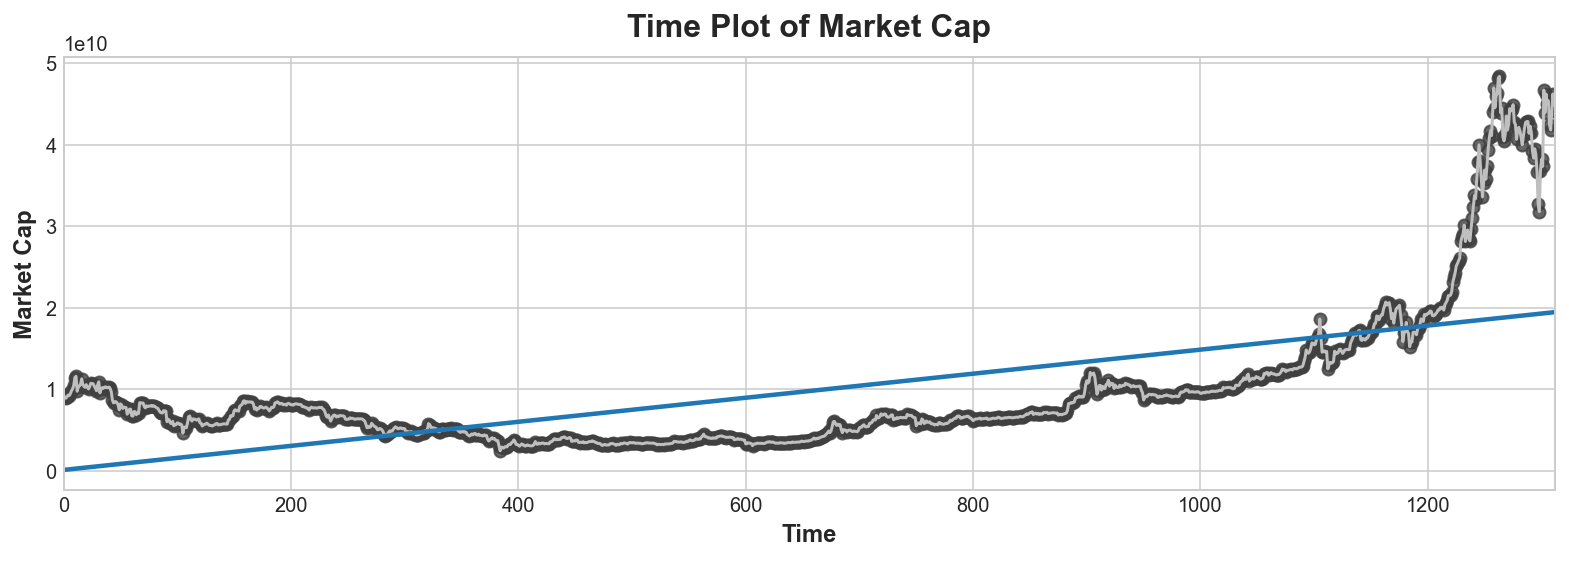

In [19]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Market Cap', data=train, color='0.75')
ax = sns.regplot(x='Time', y='Market Cap', data=train, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Market Cap');

Time-step features let us model **time dependence**. A series is time dependent if its values can be predicted from the time they occured. In the *Market Cap* series, we can predict that market cap later in the month are generally higher than market cap earlier in the month.

### Lag features

We will make a **lag feature** by shifting the observations of the target series so that they appear to have occured later in time. We will create a 1-step lag feature.

In [20]:
train['Lag_1'] = train['Market Cap'].shift(1)
train = train.reindex(columns=['Market Cap', 'Lag_1'])

train.head()

,Market Cap,Lag_1
0,9295570000,NaN
1,8990850000,9.295570e+09
2,8872600000,8.990850e+09
3,9037000000,8.872600e+09
4,9268240000,9.037000e+09


Linear regression with a lag feature produces the model:

`target = weight * lag + bias`

So lag features let us fit curves to *lag plots* where each observation in a
series is plotted against the previous observation.

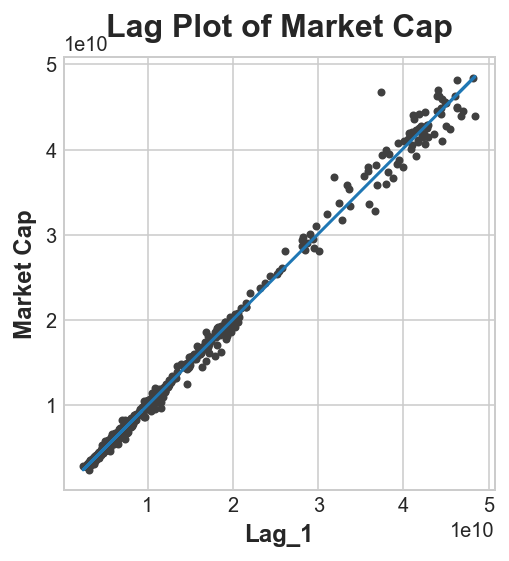

In [21]:
X = train.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # droping missing values in the feature set
y = train.loc[:, 'Market Cap']  # creating the target
y, X = y.align(X, join='inner')  # dropping corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

# plotting
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Market Cap')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Market Cap');

We can see from the lag plot that market cap on one day (`Maarket Cap`) is correlated with market cap from the previous day (`Lag_1`).
The lag plot belows tells us that the market cap on one day is correlated with market cap from the previous day.

Essentially, lag features let us model **serial dependence**. A time series has serial dependence when an observation can be predicted from previous observations. In *Market Cap*, we can predict that high market cap on one day usually means high market cap the next day.

## Trend

### Moving Average Plots

To see what kind of trend a time series might have, we can use a **moving average plot**. To compute a moving average of a time series, we will compute the average of the values within a sliding window of some defined width. Each point on the graph represents the average of all the values in the series that fall within the window on either side. The idea is to smooth out any short-term fluctuations in the series so that only long-term changes remain.

Since this series has daily observations, we will choose a window of 365 days to smooth over any short-term changes within the year.

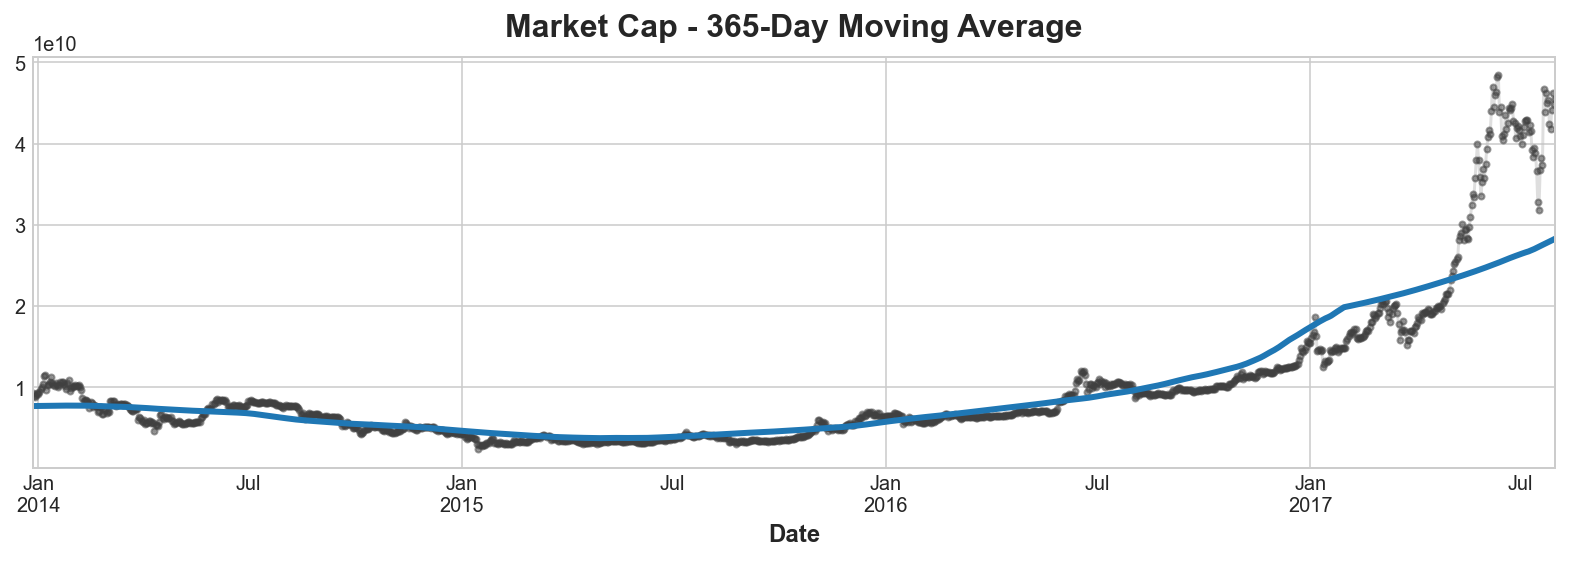

In [22]:
average_market_cap = train_plot.groupby('Date').mean()['Market Cap']

# moving average
trend = average_market_cap.rolling(
    window=365, # 365-day window
    center=True, # puts the average at the center of the window
    min_periods=183, # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = average_market_cap.plot(**plot_params, alpha=0.5)
trend.plot(
    ax=ax, linewidth=3, title='Market Cap - 365-Day Moving Average', legend=False,
);

As we can see above, the trend of *Market Cap* appears to be about linear.

### Making a forecast

To make a forecast, we will apply our model to "out of sample" features, which refers to times outside of the observation period of the training data. We will plot a portion of the series to see the trend forecast for the next 30 days:

In [23]:
from statsmodels.tsa.deterministic import DeterministicProcess

y = train['Market Cap'].squeeze()

y.index.freq = "1d"

dp = DeterministicProcess(
    index=y.index,
    # constant=True,       # dummy feature for the bias (y_intercept)
    order=2,             # the upwards bend in the trend suggests an order 2 (quadratic) polynomial
    drop=True,           # drop terms if necessary to avoid collinearity
)

# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

# creating features for a 90-day forecast
X_fore = dp.out_of_sample(steps=90)

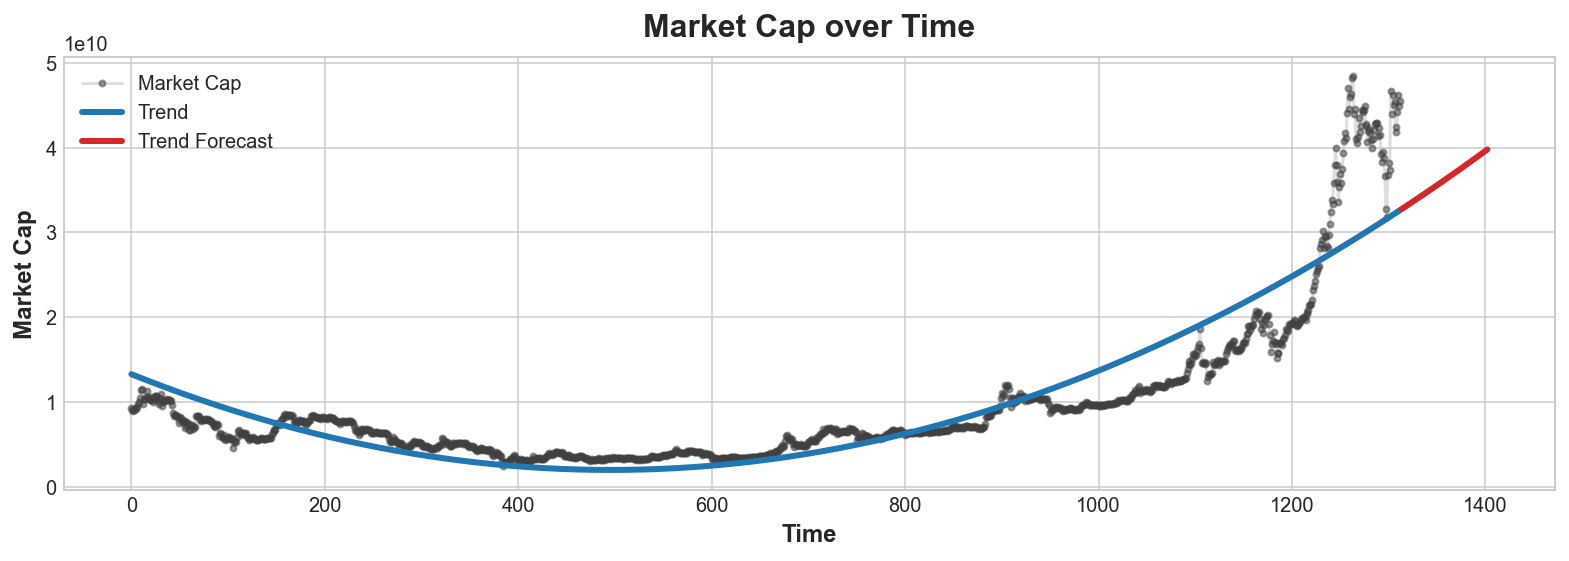

In [24]:
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(**plot_params, alpha=0.5, title='Market Cap over Time', xlabel='Time', ylabel='Market Cap')
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend();

There was a divergence in data at the end of the plot. Our model was unable to accurately forecast the prices of Bitcoin after July 2017. One reason for this huge rise in bitcoin price is that there has been a big influx of investors from large-scale institutions such as pension schemes, university endowmend funds and investment trusts.

## Summary and Future Outlook

For my future analysis, I would like to use Long Short-Term Memory (LSTM) machine learning model to predict the prices of Bitcoin. LSTM cells can learn the iomportant parts of the sequence seen so far in the historicala data of Bitcoin and forget the less important ones.